# Introduction: 

In the domain of the retail company of videogames the dataset "vgsales" is going to be analized to determinate sales strategy for the coming winter season. In the following notebook it will be covered the following aspects:

- Analyzing the dataset thanks to the libraries
- Checking the dataset in its whole: type of variables, duplicates, Missing Variables
- EDA: Handling the missing variables
- Part 1: Answering question to have a better overview over the domain of videogames
- Part 2: statistical relevant question on the dataset
- Conclusion.
   

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("vgsales.csv")

To start understanding the dataset and see the dimentionality of this the function .shape comes to play to give the reader the understanding of the dataset that will be analized.

In [3]:
df.shape

(16719, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


the function .info gives the picture of the features that are present in the DataFrame the dtype and non missing values in the column. This shows already that the dataset has floats and objectes. It gives already the information that there are numerical variables that are floats so decimal numbers and categorical variable object. 

To have a better understanding of the object and floats  variables the following function comes to help:

In [5]:
df.describe(include=object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


In [6]:
df.describe(include=float)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


It can be noticed already tgat User_Score seems to be a float but it is market as object where lots of the present obeservation are "tbd" To be confirmed and this already gives hints about the nexts steps to handle the variable. Also it gived a bit of general overview over the dataset.
In the domain of videgames on the provided dataFrame the most frequent Genre is Action for PS2 platform and developer Ubisoft. For the floats we can already have an overvire over the sales and the critic stove over the games

In [7]:
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

The data set has 16719 rows and 16 columns


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


float64    9
object     7
Name: count, dtype: int64

In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# Checking for Duplicates: 

In [9]:
df.duplicated().sum() 

0

In [10]:
for col in df.columns:
    dup_sum = df.duplicated(subset=col).sum()
    print(f"Duplicate sum in {col}: {dup_sum}")

Duplicate sum in Name: 5156
Duplicate sum in Platform: 16688
Duplicate sum in Year_of_Release: 16679
Duplicate sum in Genre: 16706
Duplicate sum in Publisher: 16137
Duplicate sum in NA_Sales: 16317
Duplicate sum in EU_Sales: 16412
Duplicate sum in JP_Sales: 16475
Duplicate sum in Other_Sales: 16564
Duplicate sum in Global_Sales: 16090
Duplicate sum in Critic_Score: 16636
Duplicate sum in Critic_Count: 16612
Duplicate sum in User_Score: 16622
Duplicate sum in User_Count: 15830
Duplicate sum in Developer: 15022
Duplicate sum in Rating: 16710


# Missing Variables: 

In [11]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Check the percentage of Missing variable for each features: 

In [12]:
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = (missing_values / total_values) * 100

print(percentage_missing)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [13]:
df.isnull().sum().sum()

46716

# Handling Missing Variables: 

It has been noticed that there are some features that are having missing variables like: 

    - Name
    - Year_of_Release 
    - Genre               
    - Publisher           
    - Critic_Score
    - Critic_Count
    - User_Score
    - Critic_Count
    - User_Score 
    - User_Count 
    - Developer
    - Rating  
    
To understand how to handle this missing variable is important before to understand which type of variable are; float and object. This is important to understand the correct approach to handle them. It is crucial to handle this before passing to the visualization part to avoid having naan values in the graphs.

Float Missing variable: Critic_Score, Critic_Count, User_count features have missing variable so for this reason they will ve filled with the mean it has been decided to have the average for the natute of the variable. Years of release even tho is a float will be handled into cateregorical variable because we cannot do an average of the years 

In [14]:
numerical_column=['Critic_Score', 'Critic_Count', 'User_Count']

In [15]:
for column  in numerical_column:
    df[column].fillna(df[column].mean(), inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_15340\93866113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [16]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

To handle the feature " Years_of_release" it will be used the mode. The reason behind is that the mode is the variable that will be most of the time present in the dataset

In [17]:
df['Year_of_Release'].fillna(df['Year_of_Release'].mean(), inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_15340\26507561.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(df['Year_of_Release'].mean(), inplace=True)


In [18]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

Object features missing variable. Due to the nature of visualization it has been avoided encode the variable to be filled after with the median the mode or the mean but it will be used "Unknown" so it will be noticed in the visualization. it has been avoided the dropna function due to the amount of missin variables 

In [19]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

In [20]:
categorical_columns = ['Name','Genre', 'Publisher', 'Developer', 'Rating']

In [21]:
for column in categorical_columns:
    df[column].fillna('Unknown', inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_15340\3161119200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)


Handling User Score due analyzing it has numerical variable but as a type it is an object. To do so before "User Score" Obeservation are analized: 

In [22]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [23]:
df['User_Score'].replace('tbd', pd.NA, inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_15340\3555740662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Score'].replace('tbd', pd.NA, inplace=True)


In [24]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [25]:
mean_value = df['User_Score'].mean()

In [26]:
df['User_Score'].fillna(mean_value, inplace=True)

C:\Users\cristinap\AppData\Local\Temp\ipykernel_15340\1855549607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Score'].fillna(mean_value, inplace=True)


Change Object into Float:

In [27]:
df['User_Score']=df['User_Score'].astype(float)

In [28]:
unique_user_scores = df["User_Score"].unique()
print(unique_user_scores)

[8.         7.12504611 8.3        8.5        6.6        8.4
 8.6        7.7        6.3        7.4        8.2        9.
 7.9        8.1        8.7        7.1        3.4        5.3
 4.8        3.2        8.9        6.4        7.8        7.5
 2.6        7.2        9.2        7.         7.3        4.3
 7.6        5.7        5.         9.1        6.5        8.8
 6.9        9.4        6.8        6.1        6.7        5.4
 4.         4.9        4.5        9.3        6.2        4.2
 6.         3.7        4.1        5.8        5.6        5.5
 4.4        4.6        5.9        3.9        3.1        2.9
 5.2        3.3        4.7        5.1        3.5        2.5
 1.9        3.         2.7        2.2        2.         9.5
 2.1        3.6        2.8        1.8        3.8        0.
 1.6        9.6        2.4        1.7        1.1        0.3
 1.5        0.7        1.2        2.3        0.5        1.3
 0.2        0.6        1.4        0.9        1.         9.7       ]


Checking if some missing variable are left: 

In [29]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [30]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,Unknown,Unknown


In [31]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

It is important now to consider that some of the variables that are float should be integers. like years of release, critic score critic count and user count 

# Change float into Integers: 

In [32]:
df['Year_of_Release'] = df['Year_of_Release'].apply(np.int64)
df['Critic_Score'] = df['Critic_Score'].apply(np.int64)
df['Critic_Count'] = df['Critic_Count'].apply(np.int64)
df['User_Count'] = df['User_Count'].apply(np.int64)
df['User_Score'] = df['User_Score'].apply(np.int64)

In [33]:
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score           int64
User_Count           int64
Developer           object
Rating              object
dtype: object

In [34]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,7,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,7,162,Unknown,Unknown


PART 1: Answering questions

# What are the top 5 games by global sales?

The dataset will be reduced for the global sales that have more value than 30. The reason behind is to optimize the running of the karnel and start reducing the dataset to see the information needed

In [35]:
GlobalSales_df=df.loc[df["Global_Sales"]>30]

In [36]:
GlobalSales_df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,7,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,7,162,Unknown,Unknown


<function matplotlib.pyplot.show(close=None, block=None)>

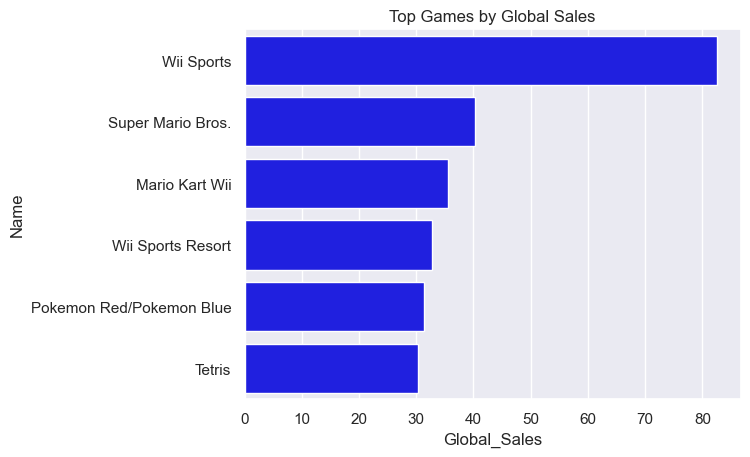

In [37]:
from numpy import mean
sns.barplot(data=GlobalSales_df, x="Global_Sales", y="Name", color="blue", estimator=mean );
plt.title("Top Games by Global Sales")
plt.show

# Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

The correlation is the Comparison between observations represented by two variables (in this case NA_sales and jp_sales) to determine if they tend to move in the same or opposite directions.To show this it is used a scatterplot. A scatterplot shows the relationshop between the variables where everydots reppresent an observation: 


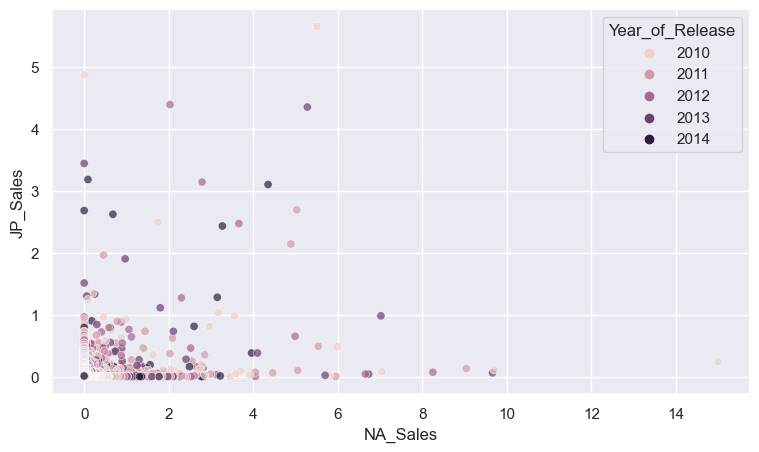

In [38]:
Specific_Years = [2010,2011,2012,2013,2014]
df_years = df[df['Year_of_Release'].isin(Specific_Years)]
plt.figure(figsize=(9,5))
sns.scatterplot(data=df_years, x='NA_Sales', y='JP_Sales', alpha=0.7, hue='Year_of_Release');

based on the scatterplot results don't show correlation between the sales for these specific years. It is important to consider that the lack of correletation not necessary means the lack of causation. 

# What is the distribution of the most popular 4 game genres?  

histogram is the most useful visualization for distribution 

In [39]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,7,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,7,162,Unknown,Unknown


C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


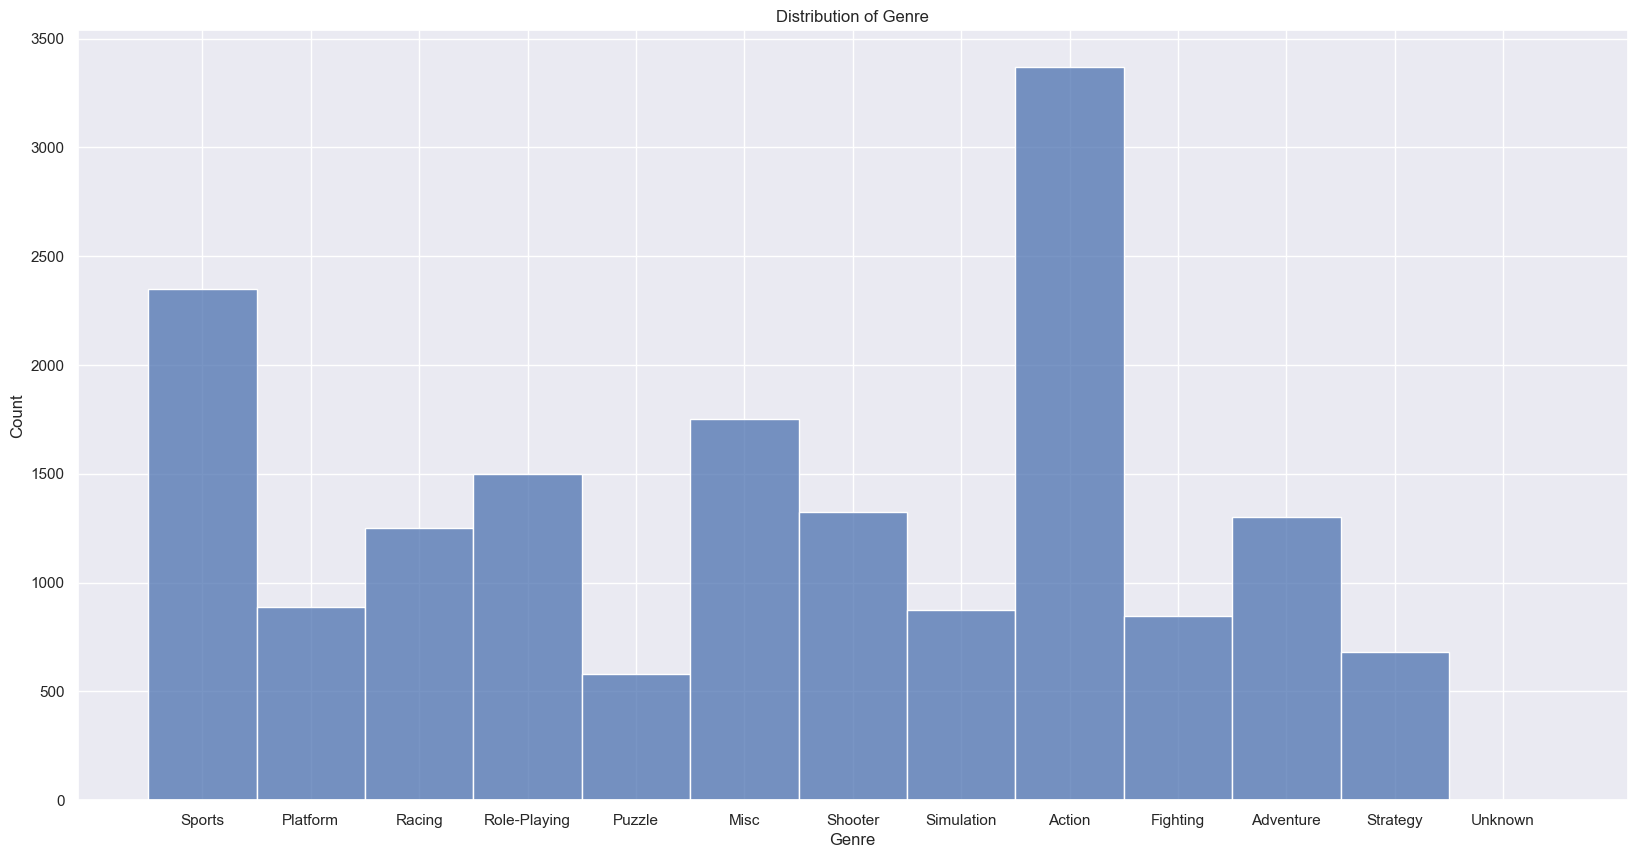

In [40]:
plt.figure(figsize=(20, 10))
sns.histplot(df["Genre"]);
plt.title('Distribution of Genre')
plt.grid(True)
plt.show()

In [41]:
genre_counts = df['Genre'].value_counts().nlargest(4)
top_genres = genre_counts.index.to_list()

In [42]:
top_genres

['Action', 'Sports', 'Misc', 'Role-Playing']

# Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

To show and obtain the mean Boxplot are the visualization that we need to use 

In [43]:
Oldergames_df=df.loc[df["Year_of_Release"]<=2005]

In [44]:
Oldergames_df.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,7,162,Unknown,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,7,162,Unknown,Unknown
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68,26,7,162,Unknown,Unknown
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,68,26,7,162,Unknown,Unknown
10,Nintendogs,DS,2005,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,68,26,7,162,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,The Lord of the Rings: The Two Towers,PS2,2002,Action,Electronic Arts,1.94,1.95,0.08,0.70,4.67,82,32,8,78,Stormfront Studios,T
229,Tomb Raider,PS,1996,Action,Eidos Interactive,2.29,1.97,0.13,0.24,4.63,91,13,8,147,Core Design Ltd.,T
232,The Legend of Zelda: A Link to the Past,SNES,1991,Action,Nintendo,2.42,0.91,1.15,0.13,4.61,68,26,7,162,Unknown,Unknown
233,The Legend of Zelda: The Wind Waker,GC,2002,Action,Nintendo,2.60,0.99,0.89,0.13,4.60,96,80,8,968,Nintendo,E


In [45]:
Newergames_df=df.loc[df["Year_of_Release"]>2005]

In [46]:
Newergames_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6,129,Nintendo,E


In [47]:
Oldergames_mean= Oldergames_df['EU_Sales'].mean()
Newergames_mean= Newergames_df['EU_Sales'].mean()
print(Oldergames_mean)
print(Newergames_mean)

0.1479159168984132
0.14335847633415047


For EU sales Data the means to be calculating aggregating the data by years

In [48]:
older_sales_by_year = Oldergames_df.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()
newer_sales_by_year = Newergames_df.groupby('Year_of_Release')['EU_Sales'].mean().reset_index()

Now using a barplot to show the mean for both new datasets for older and newer games: 

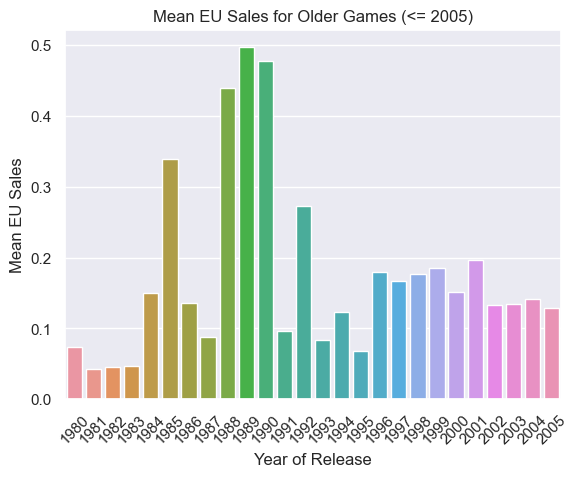

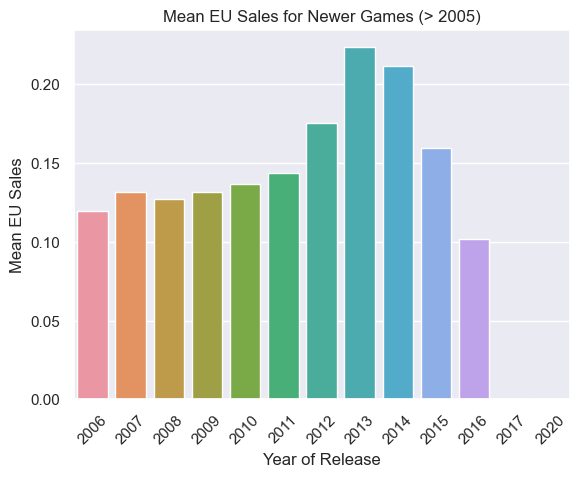

In [49]:

sns.barplot(data=older_sales_by_year, x="Year_of_Release", y="EU_Sales")
plt.title('Mean EU Sales for Older Games (<= 2005)')
plt.xlabel('Year of Release')
plt.ylabel('Mean EU Sales')
plt.xticks(rotation=45)
plt.show()
sns.barplot(data=newer_sales_by_year, x="Year_of_Release", y="EU_Sales")
plt.title('Mean EU Sales for Newer Games (> 2005)')
plt.xlabel('Year of Release')
plt.ylabel('Mean EU Sales')
plt.xticks(rotation=45)
plt.show()

# What are the 3 most common “developer” in the dataset?  

In [50]:
df["Developer"].unique

<bound method Series.unique of 0        Nintendo
1         Unknown
2        Nintendo
3        Nintendo
4         Unknown
           ...   
16714     Unknown
16715     Unknown
16716     Unknown
16717     Unknown
16718     Unknown
Name: Developer, Length: 16719, dtype: object>

In [51]:
developer_counts = df["Developer"].value_counts().sort_values(ascending=False)
print(developer_counts)

Developer
Unknown                       6623
Ubisoft                        204
EA Sports                      172
EA Canada                      167
Konami                         162
                              ... 
DMA Design, Rockstar North       1
Good Science Studio              1
Spidersoft, Spiders              1
1C, Various, 1C Company          1
Interchannel-Holon               1
Name: count, Length: 1697, dtype: int64


In [52]:
most_common_developers = df[df["Developer"].isin(developer_counts[developer_counts <1000].index)]

In [53]:
Developer_counts = most_common_developers['Developer'].value_counts().nlargest(3)
top_Developer_counts = Developer_counts.index.to_list()
top_Developer_counts

['Ubisoft', 'EA Sports', 'EA Canada']

C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


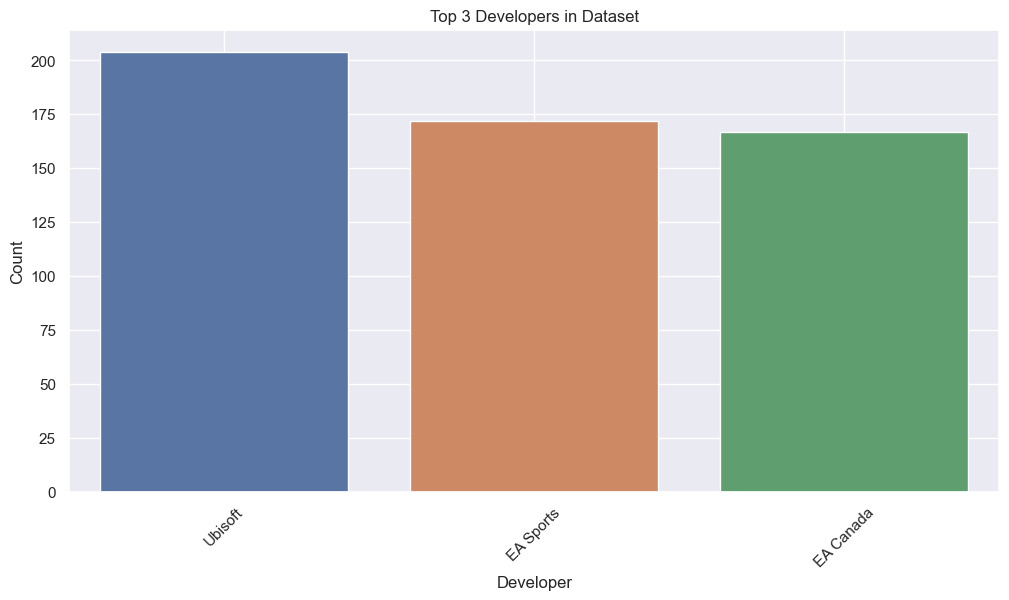

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_Developer_counts, y=Developer_counts.values)
plt.title('Top 3 Developers in Dataset')
plt.xlabel('Developer')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Part 2: 

From where was the most amount of sales? EU_Sales? NA_Sales or JP_Sales on Global Sales? 

In [55]:
total_eu_sales = df["EU_Sales"].sum()
total_na_sales = df["NA_Sales"].sum()
total_jp_sales = df["JP_Sales"].sum()
total_other_sales=df["Other_Sales"].sum()
print(f"Total EU Sales: {total_eu_sales}")
print(f"Total NA Sales: {total_na_sales}")
print(f"Total JP Sales: {total_jp_sales}")
print(f"Total other sales: {total_other_sales}")

Total EU Sales: 2424.67
Total NA Sales: 4402.620000000001
Total JP Sales: 1297.43
Total other sales: 791.34


In [56]:
sales_data = pd.DataFrame({
    'Region': ['EU', 'NA', 'JP', 'Other'],
    'Total Sales': [total_eu_sales, total_na_sales, total_jp_sales, total_other_sales]
})

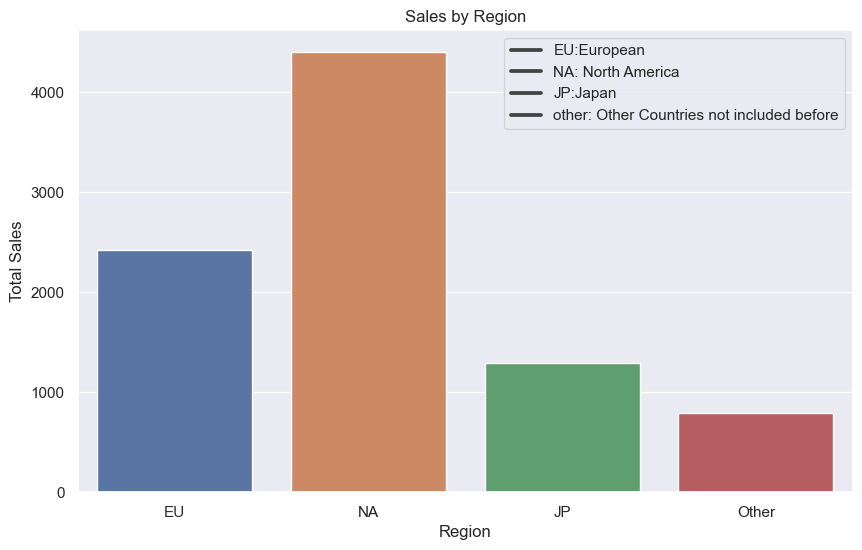

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x='Region', y='Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title("Sales by Region")
plt.legend(labels=['EU:European','NA: North America', 'JP:Japan',"other: Other Countries not included before"], loc='upper right')
plt.show()

lineplot?

C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


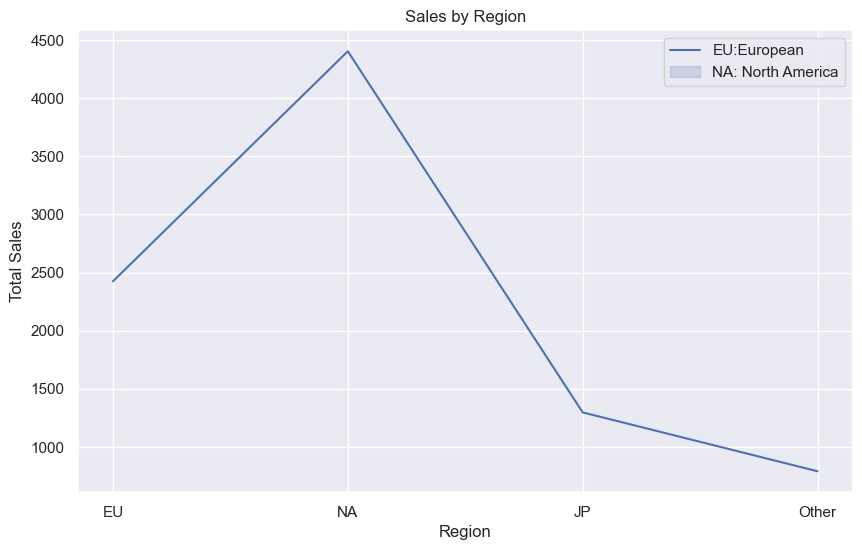

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data, x='Region', y='Total Sales')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title("Sales by Region")
plt.legend(labels=['EU:European','NA: North America', 'JP:Japan',"other: Other Countries not included before"], loc='upper right')
plt.show()

Does some genre have better sales in a specific region? 

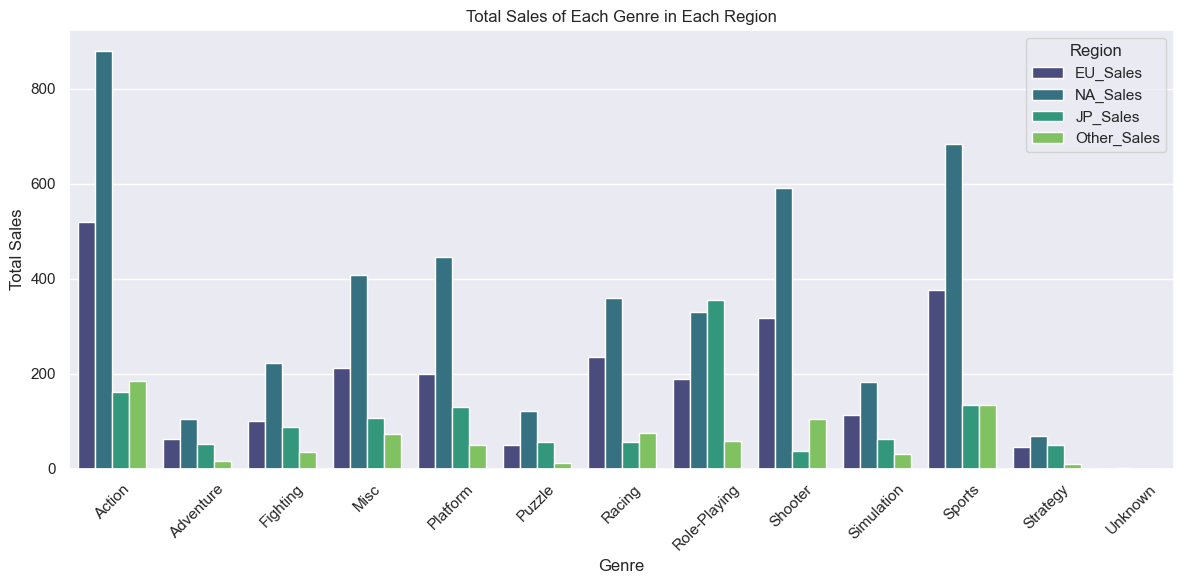

In [59]:
genre_sales = df.groupby('Genre')[['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the DataFrame to have 'Genre' as a column and 'Region' as another column
genre_sales_melted = genre_sales.melt(id_vars='Genre', var_name='Region', value_name='Total_Sales')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales_melted, x='Genre', y='Total_Sales', hue='Region', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Total Sales of Each Genre in Each Region')
plt.legend(title='Region', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

what is the distribution of age rating into the global sales? 

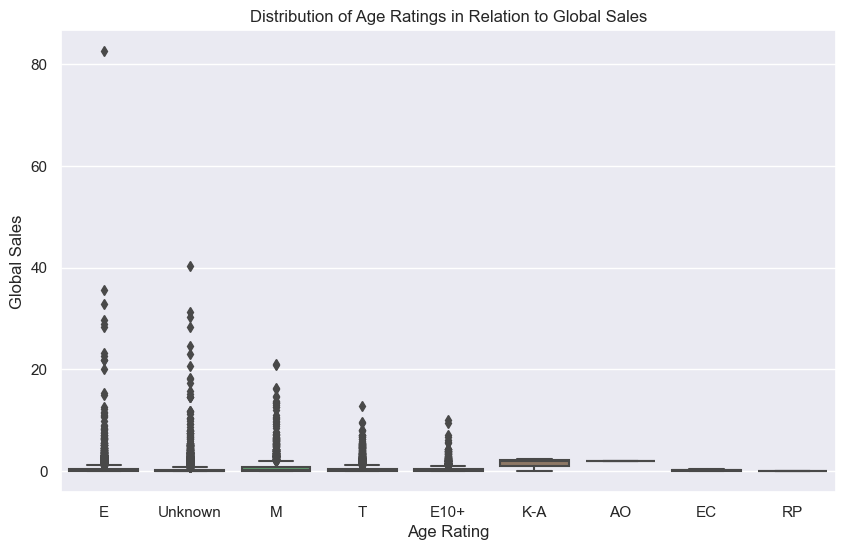

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='Global_Sales')
plt.xlabel('Age Rating')
plt.ylabel('Global Sales')
plt.title('Distribution of Age Ratings in Relation to Global Sales')
plt.show()

What is the most common Publisher? 

In [63]:
df["Publisher"].unique

<bound method Series.unique of 0            Nintendo
1            Nintendo
2            Nintendo
3            Nintendo
4            Nintendo
             ...     
16714      Tecmo Koei
16715     Codemasters
16716    Idea Factory
16717         Wanadoo
16718      Tecmo Koei
Name: Publisher, Length: 16719, dtype: object>

In [64]:
publisher_counts = df["Publisher"].value_counts().sort_values(ascending=False)
print(publisher_counts)

Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
KSS                                1
Giza10                             1
Palcom                             1
EON Digital Entertainment          1
Red Flagship                       1
Name: count, Length: 581, dtype: int64


In [66]:
most_common_publisher= df[df["Publisher"].isin(publisher_counts[publisher_counts > 900].index)]

C:\Users\cristinap\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 3000x1500 with 0 Axes>

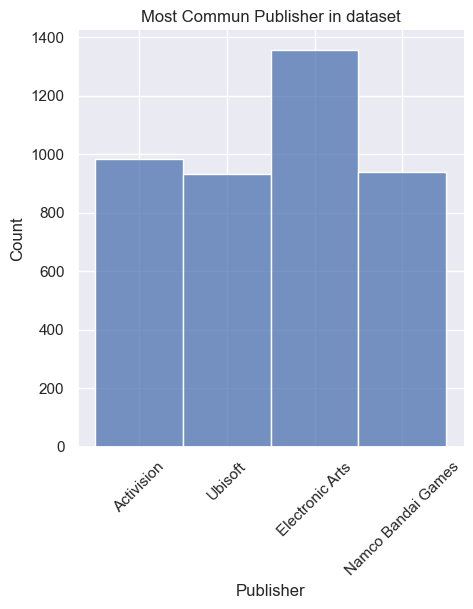

In [67]:
plt.figure(figsize=(30, 15))
sns.displot(most_common_publisher["Publisher"]);
plt.title('Most Commun Publisher in dataset')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

what are the games that have the highest rate? 

In [61]:
unique_user_scores = df["User_Score"].unique()
print(unique_user_scores)

[8 7 6 9 3 5 4 2 1 0]


<function matplotlib.pyplot.show(close=None, block=None)>

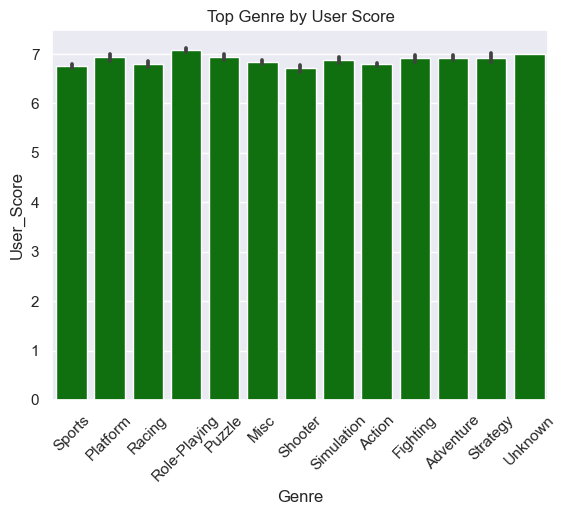

In [62]:
from numpy import mean
sns.barplot(data=df, x="Genre", y="User_Score", color="green", estimator=mean );
plt.title("Top Genre by User Score")
plt.xticks(rotation=45)
plt.show

# References: 

- Chia, Austin . “How to Make a Seaborn Histogram: A Detailed Guide.” Https://Www.datacamp.com/Tutorial/How-To-Make-a-Seaborn-Histogram, Austin Chia , Jan. 2024, www.datacamp.com/tutorial/how-to-make-a-seaborn-histogram. Accessed 24 Mar. 2024.
- “How to Sum Columns with a Duplicate Name with Pandas?” Stack Overflow, stackoverflow.com/questions/61161241/how-to-sum-columns-with-a-duplicate-name-with-pandas. Accessed 24 Mar. 2024. 
- “Seaborn.barplot — Seaborn 0.11.1 Documentation.” Seaborn.pydata.org, seaborn.pydata.org/generated/seaborn.barplot.html.
- “Matplotlib.pyplot.legend — Matplotlib 3.3.4 Documentation.” Matplotlib.org, matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html.
- “Pandas.DataFrame.shape — Pandas 2.2.1 Documentation.” Pandas.pydata.org, pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape. Accessed 24 Mar. 2024.